In [797]:
## github minCien -->  n°81

In [798]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pylab
import scipy.stats as stats
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [799]:
rc = pd.read_csv('https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv', na_values=['*'])

In [800]:
rc.head()

,comuna,LEI,II,EI,idh,HDI
0,13101,0.791672,0.873137,0.924099,0.807,0.861222
1,13102,0.782817,0.800343,0.713499,0.743,0.764616
2,13103,0.752447,0.750382,0.657961,0.683,0.718874
3,13104,0.784872,0.760697,0.705426,0.707,0.749584
4,13105,0.777236,0.780019,0.673876,0.711,0.742015


In [801]:
## HDI = indice desarrollo humano

In [802]:
rc = rc[["comuna","HDI"]]

In [803]:
rc.head()

,comuna,HDI
0,13101,0.861222
1,13102,0.764616
2,13103,0.718874
3,13104,0.749584
4,13105,0.742015


In [804]:
pob = pd.read_csv('https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/pobXedadCenso.csv', na_values=['*'])

In [805]:
pob.head()

,COMUNA,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
0,1101,0.0,0.0,15.0,0.0
1,1101,NaN,NaN,54.0,10.0
2,1101,NaN,0.0,28.0,NaN
3,1101,NaN,7.0,49.0,NaN
4,1101,NaN,NaN,26.0,7.0


In [806]:
#como de los 0 a 15 años no se han vacunado, se quita columna

In [807]:
pob = pob[["COMUNA","EDAD_15A64", "EDAD_65YMAS"]]

In [808]:
pob.head()

,COMUNA,EDAD_15A64,EDAD_65YMAS
0,1101,15.0,0.0
1,1101,54.0,10.0
2,1101,28.0,NaN
3,1101,49.0,NaN
4,1101,26.0,7.0


In [809]:
pob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180499 entries, 0 to 180498
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   COMUNA       180499 non-null  int64  
 1   EDAD_15A64   175439 non-null  float64
 2   EDAD_65YMAS  130173 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 4.1 MB


In [810]:
pob.COMUNA = pob.COMUNA.astype('object')

In [811]:
pob.columns=['Codigo comuna', 'pob15a64', 'pob65amas']

In [812]:
pob.head()

,Codigo comuna,pob15a64,pob65amas
0,1101,15.0,0.0
1,1101,54.0,10.0
2,1101,28.0,NaN
3,1101,49.0,NaN
4,1101,26.0,7.0


In [813]:
pob = pob.groupby(by="Codigo comuna").sum()

In [814]:
pob.head()

,pob15a64,pob65amas
Codigo comuna,,
1101,132629.0,16895.0
1107,72866.0,3908.0
1401,9446.0,864.0
1402,772.0,136.0
1403,1246.0,148.0


In [815]:
vac = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto81/vacunacion_comuna_edad_1eraDosis.csv', na_values=['*'])

In [816]:
vac.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,12,13,14,15,16,...,71,72,73,74,75,76,77,78,79,80
0,Arica y Parinacota,15,Arica,15101.0,247552.0,238.0,230.0,235.0,297.0,1406.0,...,1406.0,1354.0,1333.0,1243.0,1180.0,1015.0,1083.0,913.0,761.0,5194.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,3.0,...,3.0,22.0,11.0,17.0,6.0,5.0,6.0,6.0,6.0,29.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,3.0,7.0,2.0,4.0,5.0,3.0,4.0,4.0,2.0,10.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,10.0,13.0,2.0,14.0,10.0,4.0,9.0,9.0,8.0,52.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [817]:
vac = vac[vac["Codigo region"] == 13]

In [818]:
vac.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,12,13,14,15,16,...,71,72,73,74,75,76,77,78,79,80
88,Metropolitana,13,Alhue,13502.0,7405.0,42.0,31.0,30.0,27.0,68.0,...,64.0,42.0,44.0,35.0,35.0,39.0,26.0,31.0,22.0,196.0
89,Metropolitana,13,Buin,13402.0,109641.0,116.0,126.0,129.0,115.0,965.0,...,613.0,550.0,493.0,443.0,425.0,421.0,375.0,359.0,305.0,2189.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,46.0,41.0,53.0,54.0,300.0,...,197.0,190.0,145.0,149.0,132.0,145.0,125.0,108.0,73.0,718.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,63.0,69.0,63.0,74.0,544.0,...,460.0,478.0,500.0,512.0,385.0,430.0,391.0,380.0,394.0,2394.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,250.0,257.0,262.0,324.0,903.0,...,825.0,793.0,749.0,694.0,736.0,638.0,595.0,567.0,502.0,3119.0


In [819]:
vac.loc[:,'vac15a64']= vac.iloc[:,5:54].sum(axis=1)

In [820]:
vac.loc[:,'vac65a80']= vac.iloc[:,55:71].sum(axis=1)

In [821]:
vac.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,12,13,14,15,16,...,73,74,75,76,77,78,79,80,vac15a64,vac65a80
88,Metropolitana,13,Alhue,13502.0,7405.0,42.0,31.0,30.0,27.0,68.0,...,44.0,35.0,35.0,39.0,26.0,31.0,22.0,196.0,4731.0,871.0
89,Metropolitana,13,Buin,13402.0,109641.0,116.0,126.0,129.0,115.0,965.0,...,493.0,443.0,425.0,421.0,375.0,359.0,305.0,2189.0,66131.0,10455.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,46.0,41.0,53.0,54.0,300.0,...,145.0,149.0,132.0,145.0,125.0,108.0,73.0,718.0,17991.0,3537.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,63.0,69.0,63.0,74.0,544.0,...,500.0,512.0,385.0,430.0,391.0,380.0,394.0,2394.0,41319.0,8742.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,250.0,257.0,262.0,324.0,903.0,...,749.0,694.0,736.0,638.0,595.0,567.0,502.0,3119.0,61437.0,13087.0


In [822]:
vc = vac[["Comuna","Codigo comuna", "Poblacion","vac15a64","vac65a80"]]

In [823]:
vc.head()

,Comuna,Codigo comuna,Poblacion,vac15a64,vac65a80
88,Alhue,13502.0,7405.0,4731.0,871.0
89,Buin,13402.0,109641.0,66131.0,10455.0
90,Calera de Tango,13403.0,28525.0,17991.0,3537.0
91,Cerrillos,13102.0,88956.0,41319.0,8742.0
92,Cerro Navia,13103.0,142465.0,61437.0,13087.0


In [824]:
pob.head()

,pob15a64,pob65amas
Codigo comuna,,
1101,132629.0,16895.0
1107,72866.0,3908.0
1401,9446.0,864.0
1402,772.0,136.0
1403,1246.0,148.0


In [825]:
rc.head()

,comuna,HDI
0,13101,0.861222
1,13102,0.764616
2,13103,0.718874
3,13104,0.749584
4,13105,0.742015


In [826]:
rc.columns = ['Codigo comuna','HDI']

In [827]:
vc1 = pd.merge(rc, vc ,how='right', on='Codigo comuna')

In [828]:
vc1.head()

,Codigo comuna,HDI,Comuna,Poblacion,vac15a64,vac65a80
0,13502.0,0.742609,Alhue,7405.0,4731.0,871.0
1,13402.0,0.766439,Buin,109641.0,66131.0,10455.0
2,13403.0,0.715509,Calera de Tango,28525.0,17991.0,3537.0
3,13102.0,0.764616,Cerrillos,88956.0,41319.0,8742.0
4,13103.0,0.718874,Cerro Navia,142465.0,61437.0,13087.0


In [829]:
vc2 = pd.merge(pob, vc1 ,how='right', on='Codigo comuna')

In [830]:
vc2.head()

,Codigo comuna,pob15a64,pob65amas,HDI,Comuna,Poblacion,vac15a64,vac65a80
0,13502.0,4472.0,600.0,0.742609,Alhue,7405.0,4731.0,871.0
1,13402.0,66360.0,7667.0,0.766439,Buin,109641.0,66131.0,10455.0
2,13403.0,17442.0,2072.0,0.715509,Calera de Tango,28525.0,17991.0,3537.0
3,13102.0,53650.0,9273.0,0.764616,Cerrillos,88956.0,41319.0,8742.0
4,13103.0,89915.0,16011.0,0.718874,Cerro Navia,142465.0,61437.0,13087.0


In [831]:
##los datos de poblacion no coinciden con el numero de vacunados, se procede a buscar otros datos de poblacion por edad

In [832]:
vac = vc2[["Codigo comuna", "Comuna", "Poblacion","HDI","vac15a64","vac65a80"]]

In [833]:
vac.head()

,Codigo comuna,Comuna,Poblacion,HDI,vac15a64,vac65a80
0,13502.0,Alhue,7405.0,0.742609,4731.0,871.0
1,13402.0,Buin,109641.0,0.766439,66131.0,10455.0
2,13403.0,Calera de Tango,28525.0,0.715509,17991.0,3537.0
3,13102.0,Cerrillos,88956.0,0.764616,41319.0,8742.0
4,13103.0,Cerro Navia,142465.0,0.718874,61437.0,13087.0


In [834]:
pob = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto81/poblacion_comuna_edad.csv', na_values=['*'])

In [835]:
pob.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,12,13,14,15,16,...,71,72,73,74,75,76,77,78,79,80
0,Arica y Parinacota,15,Arica,15101.0,247552.0,3688.0,3538.0,3298.0,3385.0,3442.0,...,1587.0,1448.0,1394.0,1321.0,1241.0,1175.0,1094.0,982.0,880.0,6448.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,13.0,12.0,11.0,10.0,9.0,...,15.0,13.0,11.0,10.0,9.0,8.0,7.0,6.0,6.0,50.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,8.0,8.0,7.0,7.0,5.0,...,9.0,8.0,8.0,8.0,7.0,4.0,3.0,4.0,3.0,23.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,21.0,20.0,16.0,21.0,48.0,...,14.0,13.0,14.0,16.0,17.0,17.0,16.0,13.0,11.0,88.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [836]:
pob = pob[pob["Codigo region"] == 13]

In [837]:
pob.loc[:,'pob15a64']= pob.iloc[:,5:54].sum(axis=1)

In [838]:
pob.loc[:,'pob65a80']= pob.iloc[:,55:71].sum(axis=1)

In [839]:
pob.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,12,13,14,15,16,...,73,74,75,76,77,78,79,80,pob15a64,pob65a80
88,Metropolitana,13,Alhue,13502.0,7405.0,99.0,93.0,84.0,77.0,73.0,...,40.0,36.0,32.0,30.0,29.0,29.0,29.0,236.0,5134.0,864.0
89,Metropolitana,13,Buin,13402.0,109641.0,1593.0,1546.0,1479.0,1426.0,1419.0,...,502.0,461.0,414.0,381.0,348.0,323.0,296.0,2160.0,78401.0,10432.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,428.0,416.0,394.0,376.0,372.0,...,141.0,128.0,110.0,97.0,87.0,82.0,76.0,607.0,20315.0,3032.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,1150.0,1128.0,1086.0,1044.0,1043.0,...,497.0,473.0,440.0,411.0,380.0,363.0,353.0,2538.0,61411.0,10047.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,1839.0,1801.0,1751.0,1720.0,1733.0,...,963.0,901.0,827.0,756.0,683.0,626.0,565.0,3690.0,96515.0,18107.0


In [840]:
pob = pob[["Codigo comuna","pob15a64","pob65a80"]]

In [841]:
pob.head()

,Codigo comuna,pob15a64,pob65a80
88,13502.0,5134.0,864.0
89,13402.0,78401.0,10432.0
90,13403.0,20315.0,3032.0
91,13102.0,61411.0,10047.0
92,13103.0,96515.0,18107.0


In [842]:
vc = pd.merge(pob, vac ,how='right', on='Codigo comuna')

In [843]:
vc.head()

,Codigo comuna,pob15a64,pob65a80,Comuna,Poblacion,HDI,vac15a64,vac65a80
0,13502.0,5134.0,864.0,Alhue,7405.0,0.742609,4731.0,871.0
1,13402.0,78401.0,10432.0,Buin,109641.0,0.766439,66131.0,10455.0
2,13403.0,20315.0,3032.0,Calera de Tango,28525.0,0.715509,17991.0,3537.0
3,13102.0,61411.0,10047.0,Cerrillos,88956.0,0.764616,41319.0,8742.0
4,13103.0,96515.0,18107.0,Cerro Navia,142465.0,0.718874,61437.0,13087.0


In [844]:
vac = vc[["Codigo comuna", "Comuna", "Poblacion","pob15a64","pob65a80","HDI","vac15a64","vac65a80"]]

In [845]:
vac.head()

,Codigo comuna,Comuna,Poblacion,pob15a64,pob65a80,HDI,vac15a64,vac65a80
0,13502.0,Alhue,7405.0,5134.0,864.0,0.742609,4731.0,871.0
1,13402.0,Buin,109641.0,78401.0,10432.0,0.766439,66131.0,10455.0
2,13403.0,Calera de Tango,28525.0,20315.0,3032.0,0.715509,17991.0,3537.0
3,13102.0,Cerrillos,88956.0,61411.0,10047.0,0.764616,41319.0,8742.0
4,13103.0,Cerro Navia,142465.0,96515.0,18107.0,0.718874,61437.0,13087.0


In [846]:
##limpieza de datos lista, para los vacunados y la poblacion por edad se tomaron los mismos dos rangos de edad, de 15 a 64 y de 65 a 80.

In [847]:
vac['pob15a80']=vac['pob15a64']+vac['pob65a80']

<ipython-input-847-faf50b5d14cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac['pob15a80']=vac['pob15a64']+vac['pob65a80']


In [848]:
vac['vac15a80']=vac['vac15a64']+vac['vac65a80']

<ipython-input-848-b25a171b63bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac['vac15a80']=vac['vac15a64']+vac['vac65a80']


In [849]:
vac['propvac15a80']=vac['vac15a80']/vac['pob15a80']

<ipython-input-849-55653247f16a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac['propvac15a80']=vac['vac15a80']/vac['pob15a80']


In [850]:
vac.head()

,Codigo comuna,Comuna,Poblacion,pob15a64,pob65a80,HDI,vac15a64,vac65a80,pob15a80,vac15a80,propvac15a80
0,13502.0,Alhue,7405.0,5134.0,864.0,0.742609,4731.0,871.0,5998.0,5602.0,0.933978
1,13402.0,Buin,109641.0,78401.0,10432.0,0.766439,66131.0,10455.0,88833.0,76586.0,0.862135
2,13403.0,Calera de Tango,28525.0,20315.0,3032.0,0.715509,17991.0,3537.0,23347.0,21528.0,0.922088
3,13102.0,Cerrillos,88956.0,61411.0,10047.0,0.764616,41319.0,8742.0,71458.0,50061.0,0.700565
4,13103.0,Cerro Navia,142465.0,96515.0,18107.0,0.718874,61437.0,13087.0,114622.0,74524.0,0.650172


In [851]:
vac = vac[["Codigo comuna","HDI","pob15a80","vac15a80","propvac15a80"]]

In [852]:
vac.head()

,Codigo comuna,HDI,pob15a80,vac15a80,propvac15a80
0,13502.0,0.742609,5998.0,5602.0,0.933978
1,13402.0,0.766439,88833.0,76586.0,0.862135
2,13403.0,0.715509,23347.0,21528.0,0.922088
3,13102.0,0.764616,71458.0,50061.0,0.700565
4,13103.0,0.718874,114622.0,74524.0,0.650172


In [853]:
vac.columns=['Codigo comuna','HDI','Poblacion','Vacunados','PropVac']

In [854]:
vac.head()

,Codigo comuna,HDI,Poblacion,Vacunados,PropVac
0,13502.0,0.742609,5998.0,5602.0,0.933978
1,13402.0,0.766439,88833.0,76586.0,0.862135
2,13403.0,0.715509,23347.0,21528.0,0.922088
3,13102.0,0.764616,71458.0,50061.0,0.700565
4,13103.0,0.718874,114622.0,74524.0,0.650172


In [855]:
totalvac = vac[["Codigo comuna","Vacunados"]]
totalvac.head()

,Codigo comuna,Vacunados
0,13502.0,5602.0
1,13402.0,76586.0
2,13403.0,21528.0
3,13102.0,50061.0
4,13103.0,74524.0


In [856]:
# hasta aqui es info de la tarea 2 sobre HDI y vacunados, ahora comienza la info de la tarea 3

In [965]:
mue = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto50/DefuncionesDEIS_confirmadosPorComuna.csv', sep=',', na_values=['*'] )

In [966]:
mue.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,...,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07
0,Arica y Parinacota,15,Arica,15101.0,247552.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [967]:
mue = mue[mue["Codigo region"] == 13]

In [968]:
mue.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,...,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,1.0,...,1.0,4.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,1.0,0.0,...,2.0,1.0,2.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0


In [969]:
## para que comience el 24 de octubre se tiene que restar las primeras 283 columnas de fechas

In [970]:
muef = mue.iloc[:,288:484]
print(muef.columns)

Index(['2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
       '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-01', '2021-01-02',
       ...
       '2021-06-28', '2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02',
       '2021-07-03', '2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07'],
      dtype='object', length=196)


In [971]:
muef.head()

,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,...,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07
88,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0
90,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
91,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
92,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2.0,1.0,2.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0


In [972]:
muef.columns = pd.to_datetime(muef.columns).strftime("%Y/%m/%d")
print(muef.head(5))

    2020/12/24  2020/12/25  2020/12/26  2020/12/27  2020/12/28  2020/12/29  \
88         0.0         0.0         0.0         0.0         0.0         0.0   
89         0.0         0.0         0.0         0.0         0.0         0.0   
90         0.0         2.0         0.0         0.0         0.0         0.0   
91         0.0         0.0         0.0         0.0         1.0         0.0   
92         3.0         0.0         0.0         0.0         0.0         0.0   

    2020/12/30  2020/12/31  2021/01/01  2021/01/02  ...  2021/06/28  \
88         1.0         0.0         0.0         0.0  ...         0.0   
89         0.0         0.0         0.0         0.0  ...         0.0   
90         0.0         0.0         0.0         0.0  ...         0.0   
91         0.0         0.0         0.0         0.0  ...         1.0   
92         0.0         0.0         1.0         1.0  ...         2.0   

    2021/06/29  2021/06/30  2021/07/01  2021/07/02  2021/07/03  2021/07/04  \
88         0.0         0.0

In [973]:
muef = muef.groupby(pd.PeriodIndex(muef.columns, freq ='W'), axis=1).sum()

In [974]:
muef.head()

,2020-12-21/2020-12-27,2020-12-28/2021-01-03,2021-01-04/2021-01-10,2021-01-11/2021-01-17,2021-01-18/2021-01-24,2021-01-25/2021-01-31,2021-02-01/2021-02-07,2021-02-08/2021-02-14,2021-02-15/2021-02-21,2021-02-22/2021-02-28,...,2021-05-03/2021-05-09,2021-05-10/2021-05-16,2021-05-17/2021-05-23,2021-05-24/2021-05-30,2021-05-31/2021-06-06,2021-06-07/2021-06-13,2021-06-14/2021-06-20,2021-06-21/2021-06-27,2021-06-28/2021-07-04,2021-07-05/2021-07-11
88,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,3.0,3.0,...,2.0,1.0,4.0,3.0,1.0,4.0,3.0,3.0,4.0,1.0
90,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
91,0.0,2.0,2.0,1.0,0.0,1.0,0.0,6.0,3.0,2.0,...,3.0,5.0,2.0,2.0,0.0,1.0,0.0,4.0,8.0,1.0
92,3.0,2.0,3.0,4.0,5.0,3.0,8.0,6.0,5.0,2.0,...,16.0,10.0,11.0,18.0,8.0,9.0,14.0,21.0,8.0,2.0


In [975]:
mue = mue[["Codigo comuna", "Comuna", "Poblacion"]]

In [976]:
mue.head()

,Codigo comuna,Comuna,Poblacion
88,13502.0,Alhue,7405.0
89,13402.0,Buin,109641.0
90,13403.0,Calera de Tango,28525.0
91,13102.0,Cerrillos,88956.0
92,13103.0,Cerro Navia,142465.0


In [977]:
mue=pd.concat([mue,muef], axis=1)

In [978]:
mue.head()

,Codigo comuna,Comuna,Poblacion,2020-12-21/2020-12-27,2020-12-28/2021-01-03,2021-01-04/2021-01-10,2021-01-11/2021-01-17,2021-01-18/2021-01-24,2021-01-25/2021-01-31,2021-02-01/2021-02-07,...,2021-05-03/2021-05-09,2021-05-10/2021-05-16,2021-05-17/2021-05-23,2021-05-24/2021-05-30,2021-05-31/2021-06-06,2021-06-07/2021-06-13,2021-06-14/2021-06-20,2021-06-21/2021-06-27,2021-06-28/2021-07-04,2021-07-05/2021-07-11
88,13502.0,Alhue,7405.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
89,13402.0,Buin,109641.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,...,2.0,1.0,4.0,3.0,1.0,4.0,3.0,3.0,4.0,1.0
90,13403.0,Calera de Tango,28525.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
91,13102.0,Cerrillos,88956.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,...,3.0,5.0,2.0,2.0,0.0,1.0,0.0,4.0,8.0,1.0
92,13103.0,Cerro Navia,142465.0,3.0,2.0,3.0,4.0,5.0,3.0,8.0,...,16.0,10.0,11.0,18.0,8.0,9.0,14.0,21.0,8.0,2.0


In [979]:
mue = mue.drop(['Comuna', 'Poblacion'], axis=1)

In [980]:
mue.head()

,Codigo comuna,2020-12-21/2020-12-27,2020-12-28/2021-01-03,2021-01-04/2021-01-10,2021-01-11/2021-01-17,2021-01-18/2021-01-24,2021-01-25/2021-01-31,2021-02-01/2021-02-07,2021-02-08/2021-02-14,2021-02-15/2021-02-21,...,2021-05-03/2021-05-09,2021-05-10/2021-05-16,2021-05-17/2021-05-23,2021-05-24/2021-05-30,2021-05-31/2021-06-06,2021-06-07/2021-06-13,2021-06-14/2021-06-20,2021-06-21/2021-06-27,2021-06-28/2021-07-04,2021-07-05/2021-07-11
88,13502.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
89,13402.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,3.0,...,2.0,1.0,4.0,3.0,1.0,4.0,3.0,3.0,4.0,1.0
90,13403.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
91,13102.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,6.0,3.0,...,3.0,5.0,2.0,2.0,0.0,1.0,0.0,4.0,8.0,1.0
92,13103.0,3.0,2.0,3.0,4.0,5.0,3.0,8.0,6.0,5.0,...,16.0,10.0,11.0,18.0,8.0,9.0,14.0,21.0,8.0,2.0


In [981]:
data = pd.merge(vac, mue ,how='right', on='Codigo comuna')

KeyError: 'Codigo comuna'

In [982]:
data.head()

,Codigo comuna,HDI,Poblacion,Vacunados,PropVac,2020-12-21/2020-12-27,2020-12-28/2021-01-03,2021-01-04/2021-01-10,2021-01-11/2021-01-17,2021-01-18/2021-01-24,...,2021-05-03/2021-05-09,2021-05-10/2021-05-16,2021-05-17/2021-05-23,2021-05-24/2021-05-30,2021-05-31/2021-06-06,2021-06-07/2021-06-13,2021-06-14/2021-06-20,2021-06-21/2021-06-27,2021-06-28/2021-07-04,2021-07-05/2021-07-11
0,13502.0,0.742609,5998.0,5602.0,0.933978,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13402.0,0.766439,88833.0,76586.0,0.862135,0.0,0.0,0.0,1.0,2.0,...,2.0,1.0,4.0,3.0,1.0,4.0,3.0,3.0,4.0,1.0
2,13403.0,0.715509,23347.0,21528.0,0.922088,2.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,13102.0,0.764616,71458.0,50061.0,0.700565,0.0,2.0,2.0,1.0,0.0,...,3.0,5.0,2.0,2.0,0.0,1.0,0.0,4.0,8.0,1.0
4,13103.0,0.718874,114622.0,74524.0,0.650172,3.0,2.0,3.0,4.0,5.0,...,16.0,10.0,11.0,18.0,8.0,9.0,14.0,21.0,8.0,2.0


In [983]:
## vemos si la proporcion de vacunados esta correlacionado con el indice economico de la comuna:

In [984]:
vacHDI = vac[['PropVac','HDI']]

KeyError: "None of [Index(['PropVac', 'HDI'], dtype='object', name='Codigo comuna')] are in the [columns]"

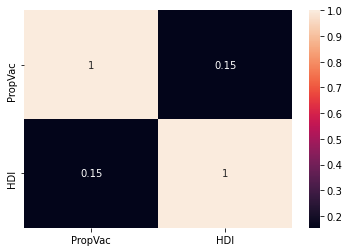

In [985]:
correlation_mat = vacHDI.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

In [986]:
# lo que muestra que la proporcion de vacunados tiene una leve positiva correlacionada respecto su HDI

In [987]:
# ahora vemos como se correlaciona las vacunas con las muertes

In [988]:
vc = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_1eraDosis.csv', na_values=['*'])

In [989]:
vc.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11
0,Arica y Parinacota,15,Arica,15101.0,247552.0,0.0,0.0,0.0,0.0,0.0,...,544.0,172.0,0.0,435.0,549.0,792.0,1123.0,1064.0,421.0,0.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,8.0,11.0,11.0,7.0,9.0,0.0,0.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [990]:
vc = vc[vc["Codigo region"] == 13]

In [991]:
vc.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,44.0,0.0,0.0,15.0,10.0,30.0,15.0,20.0,0.0,0.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,464.0,188.0,0.0,301.0,250.0,668.0,436.0,251.0,0.0,0.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,81.0,0.0,0.0,44.0,26.0,110.0,119.0,91.0,0.0,0.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,...,314.0,144.0,0.0,240.0,172.0,312.0,191.0,125.0,189.0,0.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,...,563.0,298.0,44.0,489.0,387.0,378.0,272.0,206.0,476.0,210.0


In [992]:
totalvac.head()

,Codigo comuna,Vacunados
0,13502.0,5602.0
1,13402.0,76586.0
2,13403.0,21528.0
3,13102.0,50061.0
4,13103.0,74524.0


In [993]:
vc = pd.merge(vc, totalvac ,how='right', on='Codigo comuna')
vc.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,Vacunados
0,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,15.0,10.0,30.0,15.0,20.0,0.0,0.0,5602.0
1,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,188.0,0.0,301.0,250.0,668.0,436.0,251.0,0.0,0.0,76586.0
2,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,44.0,26.0,110.0,119.0,91.0,0.0,0.0,21528.0
3,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,...,144.0,0.0,240.0,172.0,312.0,191.0,125.0,189.0,0.0,50061.0
4,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,...,298.0,44.0,489.0,387.0,378.0,272.0,206.0,476.0,210.0,74524.0


In [994]:
vac = vc.iloc[:,5:205]
print(vac.columns)

Index(['2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
       '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-01', '2021-01-02',
       ...
       '2021-07-02', '2021-07-03', '2021-07-04', '2021-07-05', '2021-07-06',
       '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11'],
      dtype='object', length=200)


In [995]:
vac.columns = pd.to_datetime(vac.columns).strftime("%Y/%m/%d")
print(vac.head(5))

   2020/12/24  2020/12/25  2020/12/26  2020/12/27  2020/12/28  2020/12/29  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2020/12/30  2020/12/31  2021/01/01  2021/01/02  ...  2021/07/02  \
0         0.0         0.0         0.0         0.0  ...        44.0   
1         0.0         0.0         0.0         0.0  ...       464.0   
2         0.0         0.0         0.0         0.0  ...        81.0   
3         0.0         0.0         0.0         0.0  ...       314.0   
4         0.0         0.0         0.0         0.0  ...       563.0   

   2021/07/03  2021/07/04  2021/07/05  2021/07/06  2021/07/07  2021/07/08  \
0         0.0         0.0        15.0  

In [996]:
vac = vac.groupby(pd.PeriodIndex(vac.columns, freq ='W'), axis=1).sum()

In [997]:
vac.head()

,2020-12-21/2020-12-27,2020-12-28/2021-01-03,2021-01-04/2021-01-10,2021-01-11/2021-01-17,2021-01-18/2021-01-24,2021-01-25/2021-01-31,2021-02-01/2021-02-07,2021-02-08/2021-02-14,2021-02-15/2021-02-21,2021-02-22/2021-02-28,...,2021-05-03/2021-05-09,2021-05-10/2021-05-16,2021-05-17/2021-05-23,2021-05-24/2021-05-30,2021-05-31/2021-06-06,2021-06-07/2021-06-13,2021-06-14/2021-06-20,2021-06-21/2021-06-27,2021-06-28/2021-07-04,2021-07-05/2021-07-11
0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,315.0,602.0,239.0,...,171.0,373.0,309.0,598.0,404.0,319.0,268.0,169.0,100.0,90.0
1,0.0,0.0,0.0,25.0,0.0,0.0,2121.0,5577.0,3805.0,1838.0,...,2965.0,4251.0,4135.0,6258.0,2904.0,2847.0,3267.0,1656.0,2227.0,1906.0
2,0.0,0.0,0.0,0.0,0.0,0.0,544.0,1862.0,1989.0,656.0,...,817.0,896.0,859.0,1119.0,826.0,604.0,799.0,550.0,359.0,390.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1804.0,5291.0,3534.0,1746.0,...,1505.0,1760.0,2148.0,3116.0,1987.0,1525.0,1888.0,662.0,917.0,1229.0
4,0.0,0.0,0.0,0.0,0.0,0.0,2133.0,6338.0,5484.0,1595.0,...,2339.0,2240.0,3176.0,6672.0,3806.0,2825.0,3330.0,1680.0,2676.0,2418.0


In [998]:
vc = vc[["Codigo comuna", "Comuna", "Poblacion"]]

In [999]:
vc.head()

,Codigo comuna,Comuna,Poblacion
0,13502.0,Alhue,7405.0
1,13402.0,Buin,109641.0
2,13403.0,Calera de Tango,28525.0
3,13102.0,Cerrillos,88956.0
4,13103.0,Cerro Navia,142465.0


In [1000]:
vac=pd.concat([vc,vac], axis=1)

In [1001]:
vac.head()

,Codigo comuna,Comuna,Poblacion,2020-12-21/2020-12-27,2020-12-28/2021-01-03,2021-01-04/2021-01-10,2021-01-11/2021-01-17,2021-01-18/2021-01-24,2021-01-25/2021-01-31,2021-02-01/2021-02-07,...,2021-05-03/2021-05-09,2021-05-10/2021-05-16,2021-05-17/2021-05-23,2021-05-24/2021-05-30,2021-05-31/2021-06-06,2021-06-07/2021-06-13,2021-06-14/2021-06-20,2021-06-21/2021-06-27,2021-06-28/2021-07-04,2021-07-05/2021-07-11
0,13502.0,Alhue,7405.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,...,171.0,373.0,309.0,598.0,404.0,319.0,268.0,169.0,100.0,90.0
1,13402.0,Buin,109641.0,0.0,0.0,0.0,25.0,0.0,0.0,2121.0,...,2965.0,4251.0,4135.0,6258.0,2904.0,2847.0,3267.0,1656.0,2227.0,1906.0
2,13403.0,Calera de Tango,28525.0,0.0,0.0,0.0,0.0,0.0,0.0,544.0,...,817.0,896.0,859.0,1119.0,826.0,604.0,799.0,550.0,359.0,390.0
3,13102.0,Cerrillos,88956.0,0.0,0.0,0.0,0.0,0.0,0.0,1804.0,...,1505.0,1760.0,2148.0,3116.0,1987.0,1525.0,1888.0,662.0,917.0,1229.0
4,13103.0,Cerro Navia,142465.0,0.0,0.0,0.0,0.0,0.0,0.0,2133.0,...,2339.0,2240.0,3176.0,6672.0,3806.0,2825.0,3330.0,1680.0,2676.0,2418.0


In [1002]:
vac = vac.drop(['Comuna', 'Poblacion'], axis=1)

In [1003]:
vac.head()

,Codigo comuna,2020-12-21/2020-12-27,2020-12-28/2021-01-03,2021-01-04/2021-01-10,2021-01-11/2021-01-17,2021-01-18/2021-01-24,2021-01-25/2021-01-31,2021-02-01/2021-02-07,2021-02-08/2021-02-14,2021-02-15/2021-02-21,...,2021-05-03/2021-05-09,2021-05-10/2021-05-16,2021-05-17/2021-05-23,2021-05-24/2021-05-30,2021-05-31/2021-06-06,2021-06-07/2021-06-13,2021-06-14/2021-06-20,2021-06-21/2021-06-27,2021-06-28/2021-07-04,2021-07-05/2021-07-11
0,13502.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,315.0,602.0,...,171.0,373.0,309.0,598.0,404.0,319.0,268.0,169.0,100.0,90.0
1,13402.0,0.0,0.0,0.0,25.0,0.0,0.0,2121.0,5577.0,3805.0,...,2965.0,4251.0,4135.0,6258.0,2904.0,2847.0,3267.0,1656.0,2227.0,1906.0
2,13403.0,0.0,0.0,0.0,0.0,0.0,0.0,544.0,1862.0,1989.0,...,817.0,896.0,859.0,1119.0,826.0,604.0,799.0,550.0,359.0,390.0
3,13102.0,0.0,0.0,0.0,0.0,0.0,0.0,1804.0,5291.0,3534.0,...,1505.0,1760.0,2148.0,3116.0,1987.0,1525.0,1888.0,662.0,917.0,1229.0
4,13103.0,0.0,0.0,0.0,0.0,0.0,0.0,2133.0,6338.0,5484.0,...,2339.0,2240.0,3176.0,6672.0,3806.0,2825.0,3330.0,1680.0,2676.0,2418.0


In [1004]:
vac.set_index('Codigo comuna',inplace=True)
vac=vac.transpose()

In [1005]:
vac.head()

Codigo comuna,13502.0,13402.0,13403.0,13102.0,13103.0,13301.0,13104.0,13503.0,13105.0,13602.0,...,13129.0,13203.0,13130.0,13505.0,13131.0,13101.0,13601.0,13303.0,13132.0,NaN
2020-12-21/2020-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,230.0,0.0,101.0,1228.0,90.0,0.0,340.0,0.0
2020-12-28/2021-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-04/2021-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-11/2021-01-17,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12.0,0.0,2.0,48.0,0.0,0.0,220.0,0.0
2021-01-18/2021-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0


In [1006]:
mue.head()

,Codigo comuna,2020-12-21/2020-12-27,2020-12-28/2021-01-03,2021-01-04/2021-01-10,2021-01-11/2021-01-17,2021-01-18/2021-01-24,2021-01-25/2021-01-31,2021-02-01/2021-02-07,2021-02-08/2021-02-14,2021-02-15/2021-02-21,...,2021-05-03/2021-05-09,2021-05-10/2021-05-16,2021-05-17/2021-05-23,2021-05-24/2021-05-30,2021-05-31/2021-06-06,2021-06-07/2021-06-13,2021-06-14/2021-06-20,2021-06-21/2021-06-27,2021-06-28/2021-07-04,2021-07-05/2021-07-11
88,13502.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
89,13402.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,3.0,...,2.0,1.0,4.0,3.0,1.0,4.0,3.0,3.0,4.0,1.0
90,13403.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
91,13102.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,6.0,3.0,...,3.0,5.0,2.0,2.0,0.0,1.0,0.0,4.0,8.0,1.0
92,13103.0,3.0,2.0,3.0,4.0,5.0,3.0,8.0,6.0,5.0,...,16.0,10.0,11.0,18.0,8.0,9.0,14.0,21.0,8.0,2.0


In [1007]:
mue.set_index('Codigo comuna',inplace=True)
mue=mue.transpose()

In [1008]:
mue.head()

Codigo comuna,13502.0,13402.0,13403.0,13102.0,13103.0,13301.0,13104.0,13503.0,13105.0,13602.0,...,13129.0,13203.0,13130.0,13505.0,13131.0,13101.0,13601.0,13303.0,13132.0,NaN
2020-12-21/2020-12-27,0.0,0.0,2.0,0.0,3.0,1.0,2.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
2020-12-28/2021-01-03,1.0,0.0,0.0,2.0,2.0,2.0,1.0,0.0,3.0,0.0,...,1.0,0.0,1.0,0.0,4.0,2.0,2.0,0.0,0.0,0.0
2021-01-04/2021-01-10,0.0,0.0,0.0,2.0,3.0,3.0,1.0,0.0,2.0,1.0,...,1.0,0.0,4.0,0.0,3.0,3.0,2.0,0.0,2.0,0.0
2021-01-11/2021-01-17,0.0,1.0,0.0,1.0,4.0,2.0,3.0,1.0,3.0,0.0,...,3.0,0.0,4.0,0.0,2.0,6.0,0.0,0.0,3.0,0.0
2021-01-18/2021-01-24,0.0,2.0,0.0,0.0,5.0,0.0,4.0,1.0,7.0,0.0,...,2.0,0.0,4.0,0.0,2.0,8.0,1.0,0.0,3.0,0.0


In [1009]:
vac.reset_index(level=0, inplace=True)

In [1010]:
mue.reset_index(level=0, inplace=True)

In [1011]:
vac.head()

Codigo comuna,index,13502.0,13402.0,13403.0,13102.0,13103.0,13301.0,13104.0,13503.0,13105.0,...,13129.0,13203.0,13130.0,13505.0,13131.0,13101.0,13601.0,13303.0,13132.0,NaN
0,2020-12-21/2020-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,230.0,0.0,101.0,1228.0,90.0,0.0,340.0,0.0
1,2020-12-28/2021-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-01-04/2021-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-01-11/2021-01-17,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12.0,0.0,2.0,48.0,0.0,0.0,220.0,0.0
4,2021-01-18/2021-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0


In [1012]:
mue.head()

Codigo comuna,index,13502.0,13402.0,13403.0,13102.0,13103.0,13301.0,13104.0,13503.0,13105.0,...,13129.0,13203.0,13130.0,13505.0,13131.0,13101.0,13601.0,13303.0,13132.0,NaN
0,2020-12-21/2020-12-27,0.0,0.0,2.0,0.0,3.0,1.0,2.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
1,2020-12-28/2021-01-03,1.0,0.0,0.0,2.0,2.0,2.0,1.0,0.0,3.0,...,1.0,0.0,1.0,0.0,4.0,2.0,2.0,0.0,0.0,0.0
2,2021-01-04/2021-01-10,0.0,0.0,0.0,2.0,3.0,3.0,1.0,0.0,2.0,...,1.0,0.0,4.0,0.0,3.0,3.0,2.0,0.0,2.0,0.0
3,2021-01-11/2021-01-17,0.0,1.0,0.0,1.0,4.0,2.0,3.0,1.0,3.0,...,3.0,0.0,4.0,0.0,2.0,6.0,0.0,0.0,3.0,0.0
4,2021-01-18/2021-01-24,0.0,2.0,0.0,0.0,5.0,0.0,4.0,1.0,7.0,...,2.0,0.0,4.0,0.0,2.0,8.0,1.0,0.0,3.0,0.0


#ya que la correlacion entre hdi y numero de vacunados era baja, se hara una regresion entre muertes totales de cada semana con vacunados totales en esa semana

In [1013]:
mue['muesum'] = mue.sum(axis=1)

In [1014]:
mue.head()

Codigo comuna,index,13502.0,13402.0,13403.0,13102.0,13103.0,13301.0,13104.0,13503.0,13105.0,...,13203.0,13130.0,13505.0,13131.0,13101.0,13601.0,13303.0,13132.0,NaN,muesum
0,2020-12-21/2020-12-27,0.0,0.0,2.0,0.0,3.0,1.0,2.0,0.0,1.0,...,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,71.0
1,2020-12-28/2021-01-03,1.0,0.0,0.0,2.0,2.0,2.0,1.0,0.0,3.0,...,0.0,1.0,0.0,4.0,2.0,2.0,0.0,0.0,0.0,103.0
2,2021-01-04/2021-01-10,0.0,0.0,0.0,2.0,3.0,3.0,1.0,0.0,2.0,...,0.0,4.0,0.0,3.0,3.0,2.0,0.0,2.0,0.0,111.0
3,2021-01-11/2021-01-17,0.0,1.0,0.0,1.0,4.0,2.0,3.0,1.0,3.0,...,0.0,4.0,0.0,2.0,6.0,0.0,0.0,3.0,0.0,125.0
4,2021-01-18/2021-01-24,0.0,2.0,0.0,0.0,5.0,0.0,4.0,1.0,7.0,...,0.0,4.0,0.0,2.0,8.0,1.0,0.0,3.0,0.0,147.0


In [1015]:
mue = mue[["index", "muesum"]]

In [1016]:
mue.head()

Codigo comuna,index,muesum
0,2020-12-21/2020-12-27,71.0
1,2020-12-28/2021-01-03,103.0
2,2021-01-04/2021-01-10,111.0
3,2021-01-11/2021-01-17,125.0
4,2021-01-18/2021-01-24,147.0


In [1017]:
mue.columns=['Fecha', 'muesum']
mue.head()

,Fecha,muesum
0,2020-12-21/2020-12-27,71.0
1,2020-12-28/2021-01-03,103.0
2,2021-01-04/2021-01-10,111.0
3,2021-01-11/2021-01-17,125.0
4,2021-01-18/2021-01-24,147.0


In [1018]:
mue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   29 non-null     object 
 1   muesum  29 non-null     float64
dtypes: float64(1), object(1)
memory usage: 592.0+ bytes


In [1019]:
new = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto13/CasosNuevosCumulativo.csv', na_values=['*'])

In [1020]:
new.head()

,Region,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,2021-07-12
0,Arica y Parinacota,0,0,0,0,0,0,0,0,0,...,88,70,62,52,31,49,96,50,39,52
1,Tarapacá,0,0,0,0,0,0,0,0,0,...,45,58,61,33,29,60,60,41,35,31
2,Antofagasta,0,0,0,0,0,0,0,0,0,...,142,93,76,32,43,112,73,101,67,64
3,Atacama,0,0,0,0,0,0,0,0,0,...,163,28,67,73,50,115,139,64,103,55
4,Coquimbo,0,0,0,0,0,0,0,0,0,...,182,148,127,90,48,121,125,136,57,105


In [1021]:
new = new.iloc[16:]
new.head()

,Region,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,2021-07-12
16,Total,0,2,1,1,2,3,5,2,6,...,3880,3368,2852,1885,1892,3193,2906,2696,2330,2160


In [1022]:
new = new.iloc[:,297:498]
print(new.columns)

Index(['2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
       '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-01', '2021-01-02',
       ...
       '2021-07-03', '2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
       '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11', '2021-07-12'],
      dtype='object', length=201)


In [1023]:
new.columns = pd.to_datetime(new.columns).strftime("%Y/%m/%d")
print(new.head(5))

    2020/12/24  2020/12/25  2020/12/26  2020/12/27  2020/12/28  2020/12/29  \
16        2395        2520        2564        1711        1923        1958   

    2020/12/30  2020/12/31  2021/01/01  2021/01/02  ...  2021/07/03  \
16        1961        3022        3588        3338  ...        3880   

    2021/07/04  2021/07/05  2021/07/06  2021/07/07  2021/07/08  2021/07/09  \
16        3368        2852        1885        1892        3193        2906   

    2021/07/10  2021/07/11  2021/07/12  
16        2696        2330        2160  

[1 rows x 201 columns]


In [1024]:
new = new.groupby(pd.PeriodIndex(new.columns, freq ='W'), axis=1).sum()
new.head()

,2020-12-21/2020-12-27,2020-12-28/2021-01-03,2021-01-04/2021-01-10,2021-01-11/2021-01-17,2021-01-18/2021-01-24,2021-01-25/2021-01-31,2021-02-01/2021-02-07,2021-02-08/2021-02-14,2021-02-15/2021-02-21,2021-02-22/2021-02-28,...,2021-05-10/2021-05-16,2021-05-17/2021-05-23,2021-05-24/2021-05-30,2021-05-31/2021-06-06,2021-06-07/2021-06-13,2021-06-14/2021-06-20,2021-06-21/2021-06-27,2021-06-28/2021-07-04,2021-07-05/2021-07-11,2021-07-12/2021-07-18
16,9190,18079,23713,27903,29268,27996,24775,24325,23414,25955,...,39221,43458,47733,50611,48736,40657,30256,22882,17754,2160


In [1025]:
new=new.transpose()

In [1026]:
new.head()

,16
2020-12-21/2020-12-27,9190
2020-12-28/2021-01-03,18079
2021-01-04/2021-01-10,23713
2021-01-11/2021-01-17,27903
2021-01-18/2021-01-24,29268


In [1027]:
new.reset_index(level=0, inplace=True)

In [1028]:
new.head()

,index,16
0,2020-12-21/2020-12-27,9190
1,2020-12-28/2021-01-03,18079
2,2021-01-04/2021-01-10,23713
3,2021-01-11/2021-01-17,27903
4,2021-01-18/2021-01-24,29268


In [1029]:
new.columns=['Fecha1', 'Nuevos contagios']
new.head()

,Fecha1,Nuevos contagios
0,2020-12-21/2020-12-27,9190
1,2020-12-28/2021-01-03,18079
2,2021-01-04/2021-01-10,23713
3,2021-01-11/2021-01-17,27903
4,2021-01-18/2021-01-24,29268


In [1030]:
mue.head()

,Fecha,muesum
0,2020-12-21/2020-12-27,71.0
1,2020-12-28/2021-01-03,103.0
2,2021-01-04/2021-01-10,111.0
3,2021-01-11/2021-01-17,125.0
4,2021-01-18/2021-01-24,147.0


In [1031]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype        
---  ------            --------------  -----        
 0   Fecha1            30 non-null     period[W-SUN]
 1   Nuevos contagios  30 non-null     int64        
dtypes: int64(1), period[W-SUN](1)
memory usage: 608.0 bytes


##juntamos data de nuevos contagios con data de muertes para saber la proporcion de muertes cada x contagios, estan ordenados en los mismos rangos por lo que no habria problema en simplemente añadirlo y no hacer la funcion "merge"

In [1032]:
mue=pd.concat([mue,new], axis=1)
mue.head()

,Fecha,muesum,Fecha1,Nuevos contagios
0,2020-12-21/2020-12-27,71.0,2020-12-21/2020-12-27,9190
1,2020-12-28/2021-01-03,103.0,2020-12-28/2021-01-03,18079
2,2021-01-04/2021-01-10,111.0,2021-01-04/2021-01-10,23713
3,2021-01-11/2021-01-17,125.0,2021-01-11/2021-01-17,27903
4,2021-01-18/2021-01-24,147.0,2021-01-18/2021-01-24,29268


In [1033]:
mue = mue.drop(['Fecha1'], axis=1)

In [1035]:
mue['muertes/contagios']=mue['muesum']/mue['Nuevos contagios']

In [1037]:
mue.head()

,Fecha,muesum,Nuevos contagios,muertes/contagios
0,2020-12-21/2020-12-27,71.0,9190,0.007726
1,2020-12-28/2021-01-03,103.0,18079,0.005697
2,2021-01-04/2021-01-10,111.0,23713,0.004681
3,2021-01-11/2021-01-17,125.0,27903,0.004480
4,2021-01-18/2021-01-24,147.0,29268,0.005023


In [1038]:
vac['vacsem'] = vac.sum(axis=1)

In [1039]:
vac = vac[["index", "vacsem"]]
vac.head()

Codigo comuna,index,vacsem
0,2020-12-21/2020-12-27,5717.0
1,2020-12-28/2021-01-03,0.0
2,2021-01-04/2021-01-10,105.0
3,2021-01-11/2021-01-17,2146.0
4,2021-01-18/2021-01-24,26.0


In [1040]:
vac.columns=['Fecha', 'vacsem']
vac.head()

,Fecha,vacsem
0,2020-12-21/2020-12-27,5717.0
1,2020-12-28/2021-01-03,0.0
2,2021-01-04/2021-01-10,105.0
3,2021-01-11/2021-01-17,2146.0
4,2021-01-18/2021-01-24,26.0


In [1041]:
vac["RollingSum"]=vac["vacsem"].expanding().sum()
vac.head()

,Fecha,vacsem,RollingSum
0,2020-12-21/2020-12-27,5717.0,5717.0
1,2020-12-28/2021-01-03,0.0,5717.0
2,2021-01-04/2021-01-10,105.0,5822.0
3,2021-01-11/2021-01-17,2146.0,7968.0
4,2021-01-18/2021-01-24,26.0,7994.0


In [1042]:
mue.head()

,Fecha,muesum,Nuevos contagios,muertes/contagios
0,2020-12-21/2020-12-27,71.0,9190,0.007726
1,2020-12-28/2021-01-03,103.0,18079,0.005697
2,2021-01-04/2021-01-10,111.0,23713,0.004681
3,2021-01-11/2021-01-17,125.0,27903,0.004480
4,2021-01-18/2021-01-24,147.0,29268,0.005023


In [1043]:
data1 = pd.merge(vac, mue ,how='right', on='Fecha')
data1.head()

,Fecha,vacsem,RollingSum,muesum,Nuevos contagios,muertes/contagios
0,2020-12-21/2020-12-27,5717.0,5717.0,71.0,9190,0.007726
1,2020-12-28/2021-01-03,0.0,5717.0,103.0,18079,0.005697
2,2021-01-04/2021-01-10,105.0,5822.0,111.0,23713,0.004681
3,2021-01-11/2021-01-17,2146.0,7968.0,125.0,27903,0.004480
4,2021-01-18/2021-01-24,26.0,7994.0,147.0,29268,0.005023


In [1046]:
data = data1[["Fecha","RollingSum","muertes/contagios"]]
data.head()

,Fecha,RollingSum,muertes/contagios
0,2020-12-21/2020-12-27,5717.0,0.007726
1,2020-12-28/2021-01-03,5717.0,0.005697
2,2021-01-04/2021-01-10,5822.0,0.004681
3,2021-01-11/2021-01-17,7968.0,0.004480
4,2021-01-18/2021-01-24,7994.0,0.005023


In [1049]:
data.columns=['Fecha', 'Vacunados', "Muertes semanales/contagios semanales"]
data.head()

,Fecha,Vacunados,Muertes semanales/contagios semanales
0,2020-12-21/2020-12-27,5717.0,0.007726
1,2020-12-28/2021-01-03,5717.0,0.005697
2,2021-01-04/2021-01-10,5822.0,0.004681
3,2021-01-11/2021-01-17,7968.0,0.004480
4,2021-01-18/2021-01-24,7994.0,0.005023


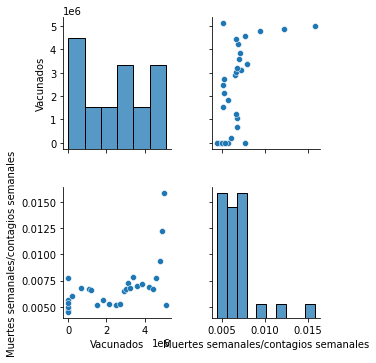

In [1050]:
sns.pairplot(data)

Text(0.5, 1.0, 'correlacion muertes y vacunados')

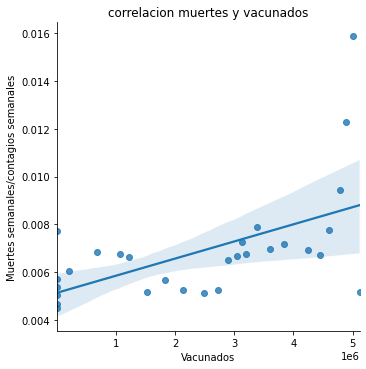

In [1053]:
Graf1 = sns.lmplot(x='Vacunados', y='Muertes semanales/contagios semanales', data=data, palette='set1')
plt.title('correlacion muertes y vacunados')

In [1056]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype        
---  ------                                 --------------  -----        
 0   Fecha                                  29 non-null     period[W-SUN]
 1   Vacunados                              29 non-null     float64      
 2   Muertes semanales/contagios semanales  29 non-null     float64      
dtypes: float64(2), period[W-SUN](1)
memory usage: 960.0 bytes


In [1057]:
X = data[['Vacunados']]
y = data['Muertes semanales/contagios semanales']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [586]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     27.44
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           3.42e-05
Time:                        14:59:12   Log-Likelihood:                -127.73
No. Observations:                  23   AIC:                             259.5
Df Residuals:                      21   BIC:                             261.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.3083     25.601      5.246      0.0